In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("Datasets/wine_data.csv")

In [4]:
df= pd.read_csv("Datasets/wine_data.csv",header=None, usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']

In [5]:
df.sample(2)

,Class label,Alcohol,Malic Acid
70,2,12.29,1.61
8,1,14.83,1.64


In [14]:
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [12]:
df.head()

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic Acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [16]:
df.shape

(178, 3)

In [17]:
df.isnull().sum()

Class label    0
Alcohol        0
Malic Acid     0
dtype: int64

In [18]:
df.describe()

,Class label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

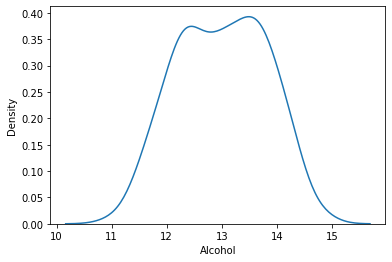

In [19]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

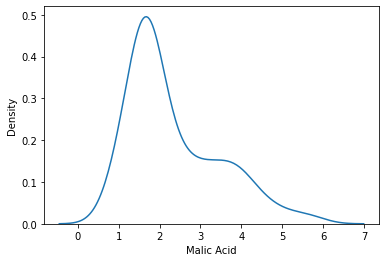

In [20]:
sns.kdeplot(df['Malic Acid'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

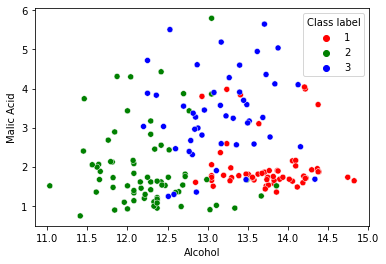

In [29]:

color_dict={1:'red',3:'blue',2:'green'}
sns.scatterplot(df['Alcohol'],df['Malic Acid'],hue=df['Class label'],palette= color_dict)


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.drop('Class label',axis=1),df['Class label'], test_size=0.3)

In [36]:
print(X_train.shape)
print(X_test.shape)

(124, 2)
(54, 2)


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
scaler.fit(X_train)

MinMaxScaler()

In [41]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [42]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [44]:
np.round(X_train.describe())

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [46]:
np.round(X_train_scaled.describe())

,Alcohol,Malic Acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


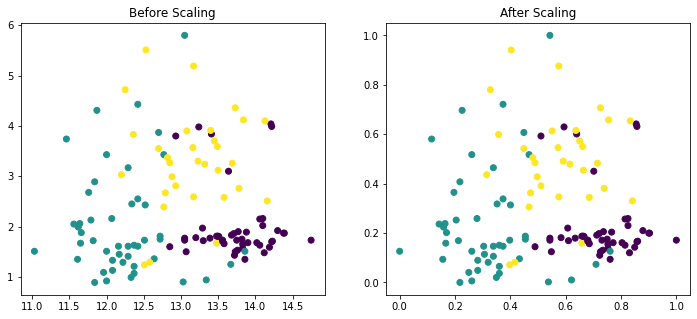

In [55]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

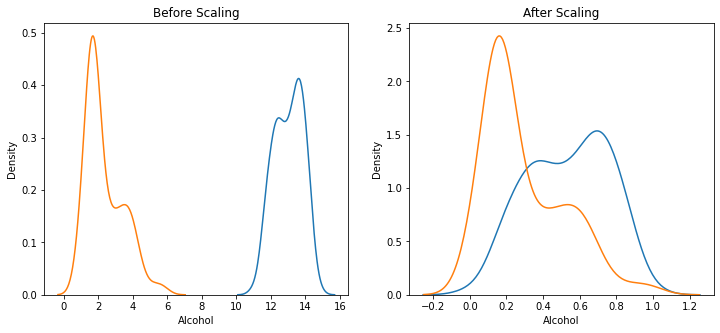

In [58]:
fig,(a1,a2)= plt.subplots(ncols=2, figsize=(12,5))
a1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=a1)
sns.kdeplot(X_train['Malic Acid'],ax=a1)
a2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax= a2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax= a2)
plt.show()